In [34]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 





In [35]:
folder_path = os.getcwd()
folder_path = os.path.join(folder_path, 'ALL RPT')
files = os.listdir(folder_path)
print(files)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)
print(excel_files_sort)

OP_50 = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
capacity = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}


['CEL00145_RPT1_127.0.0.1-BTS83-32-2-7-2818573816.xlsx', 'CEL00133_RPT1_127.0.0.1-BTS83-32-2-3-2818573813.xlsx', 'CEL00138_RPT1_127.0.0.1-BTS83-32-2-8-2818573813.xlsx', 'CEL00131_RPT1_127.0.0.1-BTS83-32-2-1-2818573813.xlsx', 'CEL00135_RPT1_127.0.0.1-BTS83-32-2-5-2818573813.xlsx', 'CEL00137_RPT1_127.0.0.1-BTS83-32-2-7-2818573813.xlsx', 'CEL00141_RPT1_127.0.0.1-BTS83-32-2-3-2818573816.xlsx', 'CEL00139_RPT1_127.0.0.1-BTS83-32-2-1-2818573816.xlsx', 'CEL00142_RPT1_127.0.0.1-BTS83-32-2-4-2818573816.xlsx', 'CEL00143_RPT1_127.0.0.1-BTS83-32-2-5-2818573816.xlsx', '.ipynb_checkpoints', 'CEL00144_RPT1_127.0.0.1-BTS83-32-2-6-2818573816.xlsx', 'CEL00132_RPT1_127.0.0.1-BTS83-32-2-2-2818573813.xlsx', 'CEL00136_RPT1_127.0.0.1-BTS83-32-2-6-2818573813.xlsx', 'CEL00140_RPT1_127.0.0.1-BTS83-32-2-2-2818573816.xlsx', 'CEL00134_RPT1_127.0.0.1-BTS83-32-2-4-2818573813.xlsx']


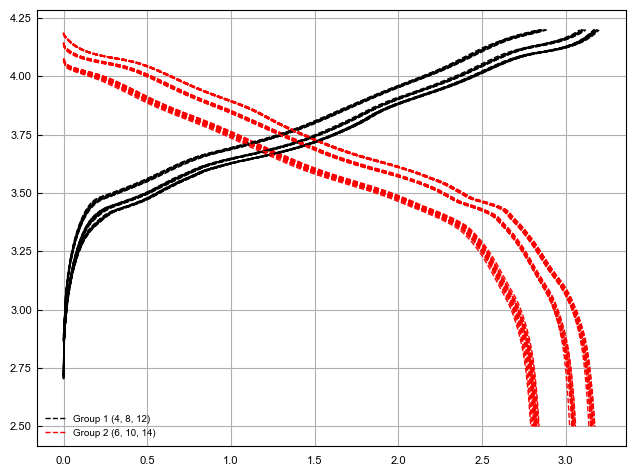

In [37]:
for file in excel_files_sort[:]:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_excel(file_path, header=0, sheet_name='record')

    def filter_data(df, step_index):
        filtered_df = df[df['Step Index'].isin([step_index])]
        filtered_df.reset_index(drop=True, inplace=True)
        voltage_data = filtered_df['Voltage(V)']
        capacity_data = filtered_df['Capacity(Ah)']
        return voltage_data, capacity_data

    # 첫 번째 그룹 (Step Index: 4, 8, 12) - 검은색 플롯
    for i, step_index in enumerate([4, 8, 12]):
        voltage_data, capacity_data = filter_data(df, step_index)
        plt.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color='black')

    # 두 번째 그룹 (Step Index: 6, 10, 14) - 빨간색 플롯
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data = filter_data(df, step_index)
        plt.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color='red')

# 수동으로 레전드 추가
plt.plot([], [], linestyle='--', linewidth=1, color='black', label='Group 1 (4, 8, 12)')
plt.plot([], [], linestyle='--', linewidth=1, color='red', label='Group 2 (6, 10, 14)')

plt.grid()
plt.legend()  # 레전드를 추가합니다.

# 플롯을 표시합니다.
plt.show()

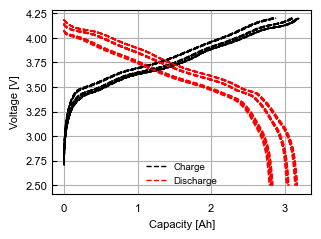

In [38]:
# Figure와 Axis 생성
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

for file in excel_files_sort[:]:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_excel(file_path, header=0, sheet_name='record')

    def filter_data(df, step_index):
        filtered_df = df[df['Step Index'].isin([step_index])]
        filtered_df.reset_index(drop=True, inplace=True)
        voltage_data = filtered_df['Voltage(V)']
        capacity_data = filtered_df['Capacity(Ah)']
        return voltage_data, capacity_data

    # 첫 번째 그룹 (Step Index: 4, 8, 12) - 검은색 플롯
    for i, step_index in enumerate([4, 8, 12]):
        voltage_data, capacity_data = filter_data(df, step_index)
        ax.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color='black')

    # 두 번째 그룹 (Step Index: 6, 10, 14) - 빨간색 플롯
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data = filter_data(df, step_index)
        ax.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color='red')

# 수동으로 레전드 추가
ax.plot([], [], linestyle='--', linewidth=1, color='black', label='Charge')
ax.plot([], [], linestyle='--', linewidth=1, color='red', label='Discharge')

ax.set_xlabel('Capacity [Ah]')  # X축 타이틀
ax.set_ylabel('Voltage [V]')  

ax.grid()
ax.legend()  # 레전드를 추가합니다.

# 플롯을 표시합니다.
plt.show()

In [50]:


excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)
print(excel_files_sort)

OP_50 = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
capacity = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}


for file in excel_files_sort[:]:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_excel(file_path, header=0, sheet_name='record')

    def filter_data(df, step_index):
        filtered_df = df[df['Step Index'].isin([step_index])]
        filtered_df.reset_index(drop=True, inplace=True)
        voltage_data = filtered_df['Voltage(V)']
        capacity_data = filtered_df['Capacity(Ah)']
        
        return voltage_data, capacity_data

    for i, step_index in enumerate([4, 6, 8, 10, 12, 14]):
        filtered_df = filter_data(df, step_index)
        Capacity = filtered_df[1].iloc[-1]
        Capacity_half = Capacity / 2 
        Mid_capacity_index = ((filtered_df[1] - Capacity_half).abs().idxmin())
        Mid_capacity_voltage = filtered_df[0].iloc[Mid_capacity_index]

        # print(f"Mid_capacity_voltage_{step_index}:", Mid_capacity_voltage)
        # print(f"Capacity_{step_index}:", Capacity)


        OP_50[i].append(Mid_capacity_voltage)
        capacity[i].append(Capacity)

key_mapping = {
    0: "1st_char",
    1: "1st_dis",
    2: "2nd_char",
    3: "2nd_dis",
    4: "3rd_char",
    5: "3rd_dis",
}


OP_50_name = {}
capacity_name = {}

for old_key, new_key in key_mapping.items():
    OP_50_name[new_key] = OP_50.pop(old_key)
    capacity_name[new_key] = capacity.pop(old_key)



df_OP = pd.DataFrame(OP_50_name)
# print(df_OP)
df_capacity = pd.DataFrame(capacity_name)
# print(df_capacity)


Capacity_means = df_capacity.mean()
print(Capacity_means)
Capacity_std = df_capacity.std()
print(Capacity_std)

['CEL00131_RPT1_127.0.0.1-BTS83-32-2-1-2818573813.xlsx', 'CEL00132_RPT1_127.0.0.1-BTS83-32-2-2-2818573813.xlsx', 'CEL00133_RPT1_127.0.0.1-BTS83-32-2-3-2818573813.xlsx', 'CEL00134_RPT1_127.0.0.1-BTS83-32-2-4-2818573813.xlsx', 'CEL00135_RPT1_127.0.0.1-BTS83-32-2-5-2818573813.xlsx', 'CEL00136_RPT1_127.0.0.1-BTS83-32-2-6-2818573813.xlsx', 'CEL00137_RPT1_127.0.0.1-BTS83-32-2-7-2818573813.xlsx', 'CEL00138_RPT1_127.0.0.1-BTS83-32-2-8-2818573813.xlsx', 'CEL00139_RPT1_127.0.0.1-BTS83-32-2-1-2818573816.xlsx', 'CEL00140_RPT1_127.0.0.1-BTS83-32-2-2-2818573816.xlsx', 'CEL00141_RPT1_127.0.0.1-BTS83-32-2-3-2818573816.xlsx', 'CEL00142_RPT1_127.0.0.1-BTS83-32-2-4-2818573816.xlsx', 'CEL00143_RPT1_127.0.0.1-BTS83-32-2-5-2818573816.xlsx', 'CEL00144_RPT1_127.0.0.1-BTS83-32-2-6-2818573816.xlsx', 'CEL00145_RPT1_127.0.0.1-BTS83-32-2-7-2818573816.xlsx']
1st_char    3.181033
1st_dis     3.159373
2nd_char    3.104260
2nd_dis     3.044727
3rd_char    2.861460
3rd_dis     2.818220
dtype: float64
1st_char    0.0100

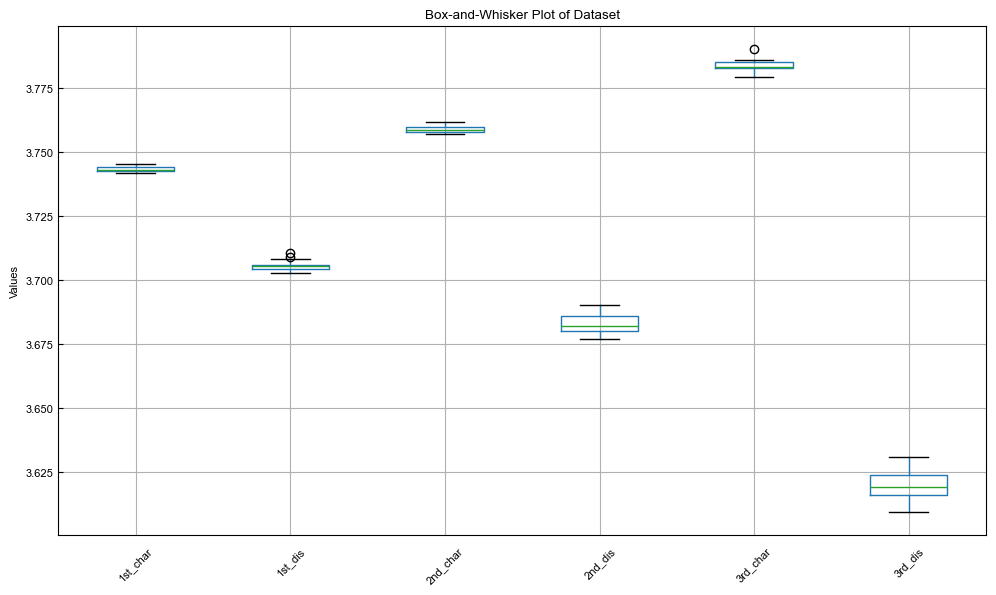

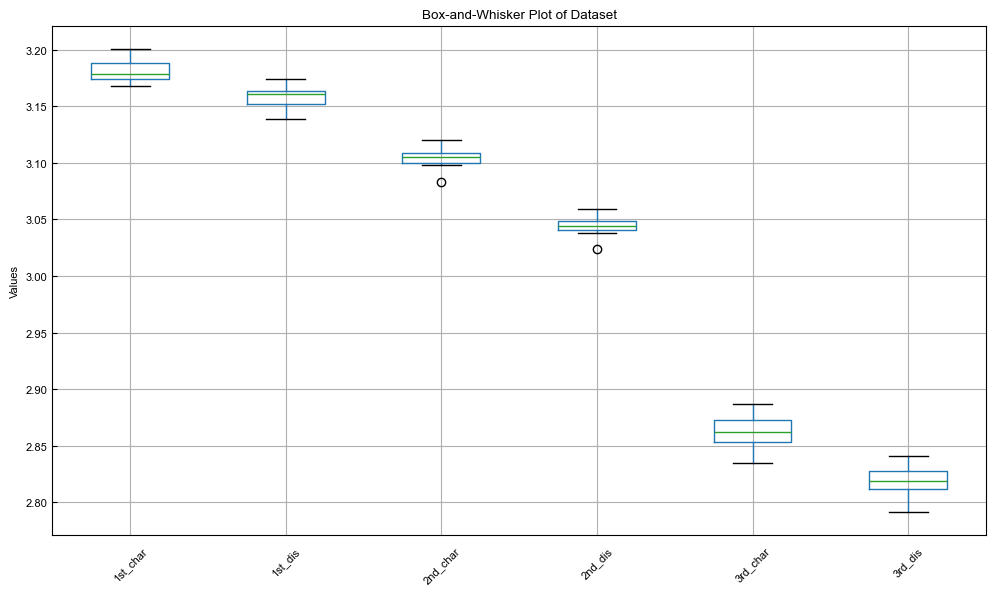

dV_C1_C20: 0.037599999999999856
dV_C2_C20: 0.0389999999999997
dV_C3_C20: 0.03810000000000002
dV_C4_C20: 0.03960000000000008
dV_C1_C5: 0.07719999999999994
dV_C2_C5: 0.07810000000000006
dV_C3_C5: 0.07909999999999995
dV_C4_C5: 0.08000000000000007
dV_C1_C2: 0.16800000000000015
dV_C2_C2: 0.1684000000000001
dV_C3_C2: 0.16929999999999978
dV_C4_C2: 0.1732999999999998


In [51]:

plt.figure(figsize=(10, 6))
df_OP.boxplot()
plt.title('Box-and-Whisker Plot of Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
df_capacity.boxplot()
plt.title('Box-and-Whisker Plot of Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


# 결과를 저장할 딕셔너리
dV_results = {}

# 각 경우에 대해 반복
char_keys = ["1st_char", "2nd_char", "3rd_char"]
dis_keys = ["1st_dis", "2nd_dis", "3rd_dis"]
result_labels = ["C20", "C5", "C2"]

for i, (char_key, dis_key, result_label) in enumerate(zip(char_keys, dis_keys, result_labels)):
    for j in range(4):
        dV_results[f'dV_C{j+1}_{result_label}'] = OP_50_name[char_key][j] - OP_50_name[dis_key][j+4]

# 결과 출력 (또는 다른 방식으로 사용)
for key, value in dV_results.items():
    print(f"{key}: {value}")

# dV_C2 = OP_50_name["2nd_char"][1]-OP_50_name["2nd_dis"][5]
# dV_C3 = OP_50_name["3rd_char"][2]-OP_50_name["3rd_dis"][6]
# dV_C4 = OP_50_name["3rd_char"][2]-OP_50_name["3rd_dis"][6]

# print(f"Efficiency_C/20:", float(capacity[1][0])/float(capacity[0][0]))
# print(f"Efficiency_C/5:", float(capacity[3][0])/float(capacity[2][0]))
# print(f"Efficiency_C/2:", float(capacity[5][0])/float(capacity[4][0]))
# print(f"Efficiency_C/20::", float(capacity[1][1])/float(capacity[0][1]))
# print(f"Efficiency_C/5:", float(capacity[3][1])/float(capacity[2][1]))
# print(f"Efficiency_C/2:", float(capacity[5][1])/float(capacity[4][1]))
# print(f"Efficiency_C/20::", float(capacity[1][2])/float(capacity[0][2]))
# print(f"Efficiency_C/5:", float(capacity[3][2])/float(capacity[2][2]))
# print(f"Efficiency_C/2:", float(capacity[5][2])/float(capacity[4][2]))
# print(f"Efficiency_C/20::", float(capacity[1][3])/float(capacity[0][3]))
# print(f"Efficiency_C/5:", float(capacity[3][3])/float(capacity[2][3]))
# print(f"Efficiency_C/2:", float(capacity[5][3])/float(capacity[4][3]))
# print(f"Efficiency_C/20::", float(capacity[1][4])/float(capacity[0][4]))
# print(f"Efficiency_C/5:", float(capacity[3][4])/float(capacity[2][4]))
# print(f"Efficiency_C/2:", float(capacity[5][4])/float(capacity[4][4]))

